## <center> Assignment 2 </center>

#### Name: Darshkumar Patel
#### Student ID: 235841910

You are provided with a training dataset and a testing dataset for a binary classification problem with labels {0,1}. The last column of the training set is the label, while the test dataset contains only attributes.

Train an effective classifier using the training dataset. You are free to choose your data processing approach, the classifier type, and tune the classifier's parameters as needed. You can use the sklearn package in Python for model implementation. 

Make predictions on the testing dataset and generate a file containing only one column of labels (predicted 0 or 1), in the same order as the testing dataset.

Please submit your implementation code and the predicted output file as two separate files (not in a zip) in the names "A2.ipynb" and "prediction.txt". Your assignment will be evaluated based on the performance of your model, specifically its F1-score, among other criteria.

In [2]:
import pandas as pd
df_train = pd.read_csv('train.csv',sep=',',index_col=0) 
df_test_attribute_only = pd.read_csv('test_attribute.csv',sep=',',index_col=0) 

In [3]:
df_train

,0,1,2,3,4,5,6,7,8
0,0.81,0.85,0.47,0.37,0.5,0.0,0.56,0.22,1
1,0.70,0.58,0.53,0.39,0.5,0.0,0.59,0.22,1
2,0.72,0.73,0.41,0.28,0.5,0.0,0.44,0.22,1
3,0.78,0.69,0.44,0.26,0.5,0.0,0.54,0.22,1
4,0.74,0.82,0.46,0.24,0.5,0.0,0.48,0.22,1
...,...,...,...,...,...,...,...,...,...
647,0.48,0.47,0.54,0.55,0.5,0.0,0.51,0.65,0
648,0.49,0.61,0.49,0.25,0.5,0.0,0.50,0.28,0
649,0.48,0.43,0.45,0.17,0.5,0.0,0.48,0.37,0
650,0.77,0.57,0.45,0.17,0.5,0.0,0.53,0.22,0


In [4]:
df_test_attribute_only

,0,1,2,3,4,5,6,7
0,0.74,0.72,0.50,0.28,0.5,0.00,0.49,0.27
1,0.80,0.88,0.36,0.39,0.5,0.00,0.56,0.33
2,0.57,0.52,0.46,0.20,0.5,0.83,0.52,0.41
3,0.77,0.82,0.40,0.36,0.5,0.00,0.38,0.22
4,0.69,0.60,0.51,0.13,0.5,0.83,0.52,0.22
...,...,...,...,...,...,...,...,...
347,0.29,0.46,0.54,0.27,0.5,0.00,0.49,0.22
348,0.53,0.52,0.61,0.35,0.5,0.00,0.50,0.22
349,0.48,0.49,0.49,0.26,0.5,0.00,0.39,0.27
350,0.39,0.58,0.50,0.26,0.5,0.00,0.54,0.59


### Now below I will try to understand the data provided to me by checking its, datatype, null values if there and other factors to know my data well.

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 652 entries, 0 to 651
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       652 non-null    float64
 1   1       652 non-null    float64
 2   2       652 non-null    float64
 3   3       652 non-null    float64
 4   4       652 non-null    float64
 5   5       652 non-null    float64
 6   6       652 non-null    float64
 7   7       652 non-null    float64
 8   8       652 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 50.9 KB


In [6]:
df_train.describe()

,0,1,2,3,4,5,6,7,8
count,652.00000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000
mean,0.50773,0.513037,0.491058,0.271380,0.504601,0.009172,0.503482,0.255245,0.098160
std,0.12987,0.123411,0.090638,0.138654,0.047780,0.083864,0.054488,0.081545,0.297759
min,0.19000,0.140000,0.210000,0.000000,0.500000,0.000000,0.130000,0.010000,0.000000
25%,0.42000,0.430000,0.440000,0.170000,0.500000,0.000000,0.480000,0.220000,0.000000
50%,0.49000,0.500000,0.510000,0.230000,0.500000,0.000000,0.510000,0.220000,0.000000
75%,0.58000,0.580000,0.550000,0.340000,0.500000,0.000000,0.540000,0.270000,0.000000
max,0.92000,1.000000,1.000000,0.800000,1.000000,0.830000,0.720000,0.740000,1.000000


In [7]:
df_test_attribute_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 352 entries, 0 to 351
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       352 non-null    float64
 1   1       352 non-null    float64
 2   2       352 non-null    float64
 3   3       352 non-null    float64
 4   4       352 non-null    float64
 5   5       352 non-null    float64
 6   6       352 non-null    float64
 7   7       352 non-null    float64
dtypes: float64(8)
memory usage: 24.8 KB


In [8]:
df_test_attribute_only.describe()

,0,1,2,3,4,5,6,7
count,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000
mean,0.512045,0.514091,0.493295,0.279233,0.505682,0.014631,0.498778,0.251847
std,0.139798,0.124183,0.096136,0.157745,0.053072,0.104992,0.059268,0.085503
min,0.200000,0.210000,0.230000,0.080000,0.500000,0.000000,0.130000,0.000000
25%,0.410000,0.430000,0.440000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.500000,0.500000,0.230000,0.500000,0.000000,0.510000,0.220000
75%,0.590000,0.582500,0.550000,0.360000,0.500000,0.000000,0.530000,0.260000
max,1.000000,0.920000,1.000000,1.000000,1.000000,0.830000,0.730000,0.830000


In [9]:
df_test_attribute_only.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

In [10]:
df_train.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

## Importing Essential libraries

In [11]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,roc_curve,roc_auc_score,accuracy_score,classification_report,precision_score,recall_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

## Hyper tuning the Paramaeters using Grid Search and Cross Validating the data using k-fold technique
Cross-validation is a technique used to assess how well a predictive model will generalize to an independent dataset. It is particularly useful for evaluating the performance of machine learning models when you have a limited amount of data. 

In [41]:
# Working with train.csv file
x_train=df_train.iloc[:,:-1]
# The above x_train will select all the columns except the last one(,:-1) and will be using it for training purpose
y_train=df_train.iloc[:,-1]
# The above y_train means it will be selecting the last column/prediction column from our data which will work as a prdictor(0/1)

In [42]:
# Here we are splitting the data into Training and Validation set
X_train,X_validate,Y_train,Y_validate= train_test_split(x_train,y_train,test_size=0.30)

### Here, I will be using the grid search method to tune the parameters for Random Forest Algorithm

In [43]:
# Using the classifier and creating a model here called random_model i.e. Random Forest Classifier
random_model = RandomForestClassifier()

In [44]:
# GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.
# Lets define the parameters using the dictionary (These parameters are already defined under the whatever Classifier we are using)
param_grid_random ={
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

In [45]:
# Grid Search for Random Forest hyperparameters
#The grid search will use 3-fold cross-validation and run in parallel to find the best hyperparameters.
grid_search_random = GridSearchCV(estimator=random_model, param_grid=param_grid_random, cv=3, n_jobs=-1, verbose=2)
grid_search_random.fit(X_train, Y_train)

# These are the best parametres generated on the basis of Grid Search
best_params_random = grid_search_random.best_params_
print("Best Parameters for Random Forest:", best_params_random)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best Parameters for Random Forest: {'bootstrap': True, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}


C:\Users\darsh\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
486 fits failed out of a total of 972.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
96 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\darsh\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\darsh\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\darsh\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\darsh\anaconda3\Lib\site-package

In [46]:
# Now I will be Training the Model using the Best Parameters Generated Using the Grid Search.
# Thus It will me by best Model which I can in future for Prediction
best_random_model = RandomForestClassifier(**best_params_random)
best_random_model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=50)

In [47]:
# Here Finally I have predicted the X_validate which I am using here to test the prediction
Y_validate_pred = best_random_model.predict(X_validate)
print("The predcitions made my the model for this Training data is:""\n",Y_validate_pred)

The predcitions made my the model for this Training data is:
 [0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0]


In [48]:
# Here I am checking the Cross Validation score of my model
random_score = cross_val_score(best_random_model,X_train,Y_train,cv=3)
#The output you provided shows the cross-validation scores for each 
# fold of the 5-fold cross-validation with a decision tree classifier.
print("Cross Validation score for Random Forest",random_score)
print("Mean Cross Validation score is ",random_score.mean())

Cross Validation score for Random Forest [0.95394737 0.95394737 0.93421053]
Mean Cross Validation score is  0.9473684210526315


## It seems My Random Forest Model is Working well So i will carry on with this model for predcitng the Test_attribute_data

### Now lets check the other imortant performance mertics of our model like accuracy score, f1 Score, roc curve , confusin matric etc for our training data 

For Finding all these measures I will be using the value that my best model predicted with the true values that were described in the Dataset given to us.

### F1 score


In [49]:
#The F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. 
f1= f1_score(Y_validate, Y_validate_pred)
print(f1)

0.8571428571428571


### Accuracy Score

In [50]:
# How accurate my model is predicting
acc = accuracy_score(Y_validate, Y_validate_pred)
print("Accuracy Score:", acc)

Accuracy Score: 0.9693877551020408


### ROC CURVE AND ROC_AUC_SCORE

In [51]:
#The ROC curve shows how well a model can distinguish between two things. 
# It does this by plotting the true positive rate against the false positive rate.
# While roc_auc_score tells us the performance of the model(Area Under The Curve)
roc_auc = roc_auc_score(Y_validate, Y_validate_pred)
print("ROC AUC Score:", roc_auc)
# For going for more detail we can also calculate predicticated probabilties for our prediction "x_train_prediction"
# calculating y_pred_proba provides more detailed information about
# the model's predictions and can be useful for making decisions based on the confidence level of the model.
# Calculate predicted probabilities for class 1
# y_pred_proba = random_model.predict_proba(X_validate)[:, 1]
# print(y_pred_proba)

ROC AUC Score: 0.875


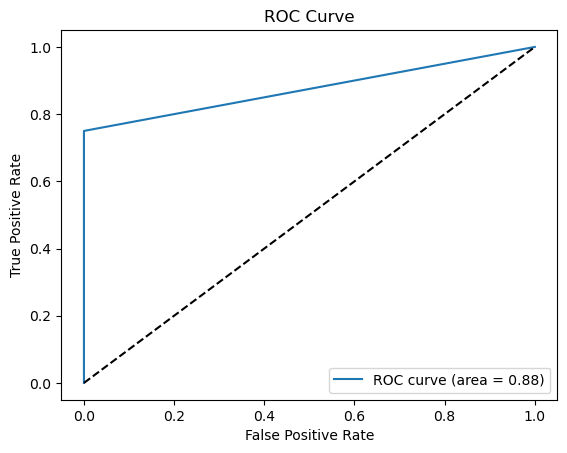

In [52]:
# Visualizing the ROC curve
fpr, tpr, _ = roc_curve(Y_validate, Y_validate_pred)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### CONFUSION MATRIX

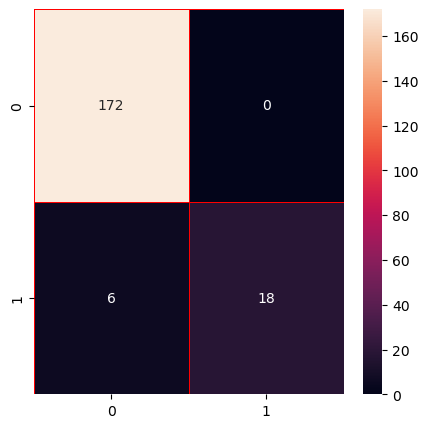

In [53]:
#A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known.
#It allows us to see how well the model is performing in terms of predicting the classes correctly.
cm = metrics.confusion_matrix(Y_validate, Y_validate_pred)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax, alpha=1)
plt.show()

True Positives (TP): Our model correctly predicted 172 instances where the condition is true.<br>
False Negatives (FN): Our model missed 0 instances where the condition is true.<br>
False Positives (FP): Our model incorrectly predicted 6 instances as true when they are actually false.<br>
True Negatives (TN): Our model correctly predicted 18 instances where the condition is false.<br>

In [54]:
# Confusion Matrix
#           Predicted
#           Positive   Negative
# Actual  ------------------------
# Positive |   TP        FN
# Negative |   FP        TN

In [55]:
# This is a function provided my slkearn metrics which gives us a overview of our model's working
report =classification_report(Y_validate,Y_validate_pred)
print("Summarized Report of the Model""\n",report)

Summarized Report of the Model
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       172
           1       1.00      0.75      0.86        24

    accuracy                           0.97       196
   macro avg       0.98      0.88      0.92       196
weighted avg       0.97      0.97      0.97       196



## Now lets work on predicting and creating a predicted output txt file the test data that has been provided 

### I will be using Random Forest Algorithm as mentioned above

In [56]:
#As we want to predict the test data lets call it
print("Given Labels for Testing""\n",df_test_attribute_only)

Given Labels for Testing
         0     1     2     3    4     5     6     7
0    0.74  0.72  0.50  0.28  0.5  0.00  0.49  0.27
1    0.80  0.88  0.36  0.39  0.5  0.00  0.56  0.33
2    0.57  0.52  0.46  0.20  0.5  0.83  0.52  0.41
3    0.77  0.82  0.40  0.36  0.5  0.00  0.38  0.22
4    0.69  0.60  0.51  0.13  0.5  0.83  0.52  0.22
..    ...   ...   ...   ...  ...   ...   ...   ...
347  0.29  0.46  0.54  0.27  0.5  0.00  0.49  0.22
348  0.53  0.52  0.61  0.35  0.5  0.00  0.50  0.22
349  0.48  0.49  0.49  0.26  0.5  0.00  0.39  0.27
350  0.39  0.58  0.50  0.26  0.5  0.00  0.54  0.59
351  0.42  0.49  0.49  0.36  0.5  0.00  0.57  0.26

[352 rows x 8 columns]


In [57]:
#Now lets predict our test Data and here I am using the best_random_model which is using the tuned Parameters
# So basically this is the best model and will work well while giving the predictions
y_prediction=best_random_model.predict(df_test_attribute_only)

In [58]:
# Stroing my output result In a file named predictions.txt
pd.DataFrame(y_prediction, columns=['y_prediction']).to_csv('predictions.txt', index=False)

In [59]:
print("The prediction made by the classifier""\n",y_prediction)

The prediction made by the classifier
 [0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### REFERNCES 

 https://developers.google.com/machine-learning
<br>       
Hyper tuning parameters:https://medium.com/analytics-vidhya/a-beginners-guide-to-random-forest-hyperparameter-tuning-4692c3ab7537
<br>
Random Forest: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor
<br>
Model Evaluation:
https://neptune.ai/blog/ml-model-evaluation-and-selection

### Briefly describe your approach in the following cell.

After assessing both the training dataset and the test attribute data, I performed the data preparation to address null values, verify data types, and acquire additional information to better understand the dataset's features. I then imported all of the necessary libraries for subsequent stages. Using the Random Forest approach, I ran cross-validation to evaluate the model's performance, dividing the data into training and validation sets. In addition, I used the Grid Search approach to find the optimal tuning parameters for my model. After determining the most appropriate parameters, I trained the model, predicted on the training data, and assessed its performance using metrics such as accuracy, performance score, ROC curve, and confusion matrix.Satisfied with the model's performance, I proceeded to predict the output of the test_attribute.csv dataset for the final assignment and saved the results in a text file.